In [2]:
# 小批量随机梯度下降
# 读取数据
%matplotlib inline
import numpy as np
import time
import torch
from torch import nn,optim
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l

def get_data_ch7():
    data = np.genfromtxt('../../data/airfoil_self_noise.dat',delimiter='\t')
    data = (data - data.mean(axis=0))/data.std(axis=0)
    return torch.tensor(data[:1500,:-1],dtype=torch.float32),torch.tensor(data[:1500,-1],dtype=torch.float32)

features,labels = get_data_ch7()
features.shape

torch.Size([1500, 5])

loss: 0.244291, 0.015011 sec per epoch


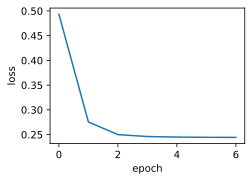

In [21]:
# 从零开始实现
def sgd(params,states,hyperparams):
    for p in params:
        p.data -= hyperparams['lr']*p.grad.data
        
def train_ch7(optimizer_fn,states,hyperparams,features,labels,batch_size=10,
             num_epochs=2):
    # 初始化模型
    net,loss = d2l.linreg,d2l.squared_loss
    w = torch.nn.Parameter(torch.tensor(np.random.normal(0,0.01,size = (features.shape[1],1)),dtype = torch.float32)
                          ,requires_grad=True)
    b = torch.nn.Parameter(torch.zeros(1,dtype=torch.float32),requires_grad=True)
    
    def eval_loss():
        return loss(net(features,w,b),labels).mean().item()
    
    ls = [eval_loss()]
    data_iter = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(features,labels),batch_size,shuffle=True)
    
    for _ in range(num_epochs):
        start = time.time()
        for batch_i,(X,y) in enumerate(data_iter):
            l = loss(net(X,w,b),y).mean()
            
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
                
            l.backward()
            optimizer_fn([w,b],states,hyperparams)
            
            if (batch_i + 1)* batch_size%100==0:
                ls.append(eval_loss())
    print('loss: %f, %f sec per epoch' % (ls[-1], time.time() - start))
    d2l.set_figsize()
    d2l.plt.plot(np.linspace(0, num_epochs, len(ls)), ls)
    d2l.plt.xlabel('epoch')
    d2l.plt.ylabel('loss')

def train_sgd(lr, batch_size, num_epochs=2):
    train_ch7(sgd, None, {'lr': lr}, features, labels, batch_size, num_epochs)

train_sgd(1, 1500, 6)    


loss: 0.247931, 0.616392 sec per epoch


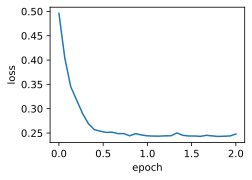

In [16]:
train_sgd(0.004,1) 

loss: 0.249769, 0.086060 sec per epoch


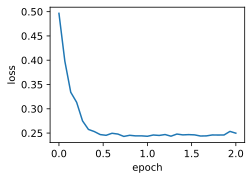

In [11]:
train_sgd(0.05,10) 

In [ ]:
# 简洁实现
